In [86]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split


# Exploratory Data Analysis

Loading the data set

In [84]:
acceptedloans=pd.read_csv('acceptedloans.csv')

C:\Users\Srujana\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dimensions of Accepted Loans Data

In [5]:
acceptedloans.shape

(2260701, 151)

Column List of Accepted Loans

In [6]:
acceptedloans_coulmns = acceptedloans.columns.tolist()
acceptedloans_coulmns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

Demographics of accepted loan applicants

In [28]:
acceptedloans['addr_state'].value_counts()

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

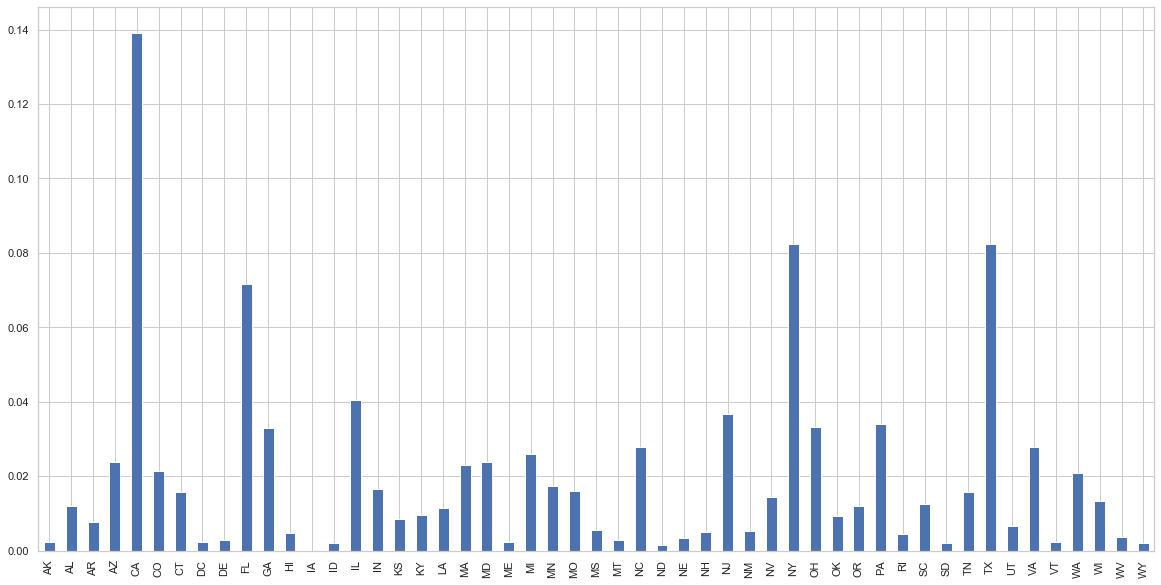

In [29]:
(acceptedloans['addr_state'].value_counts().sort_index()/len(acceptedloans)).plot.bar()

In [36]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

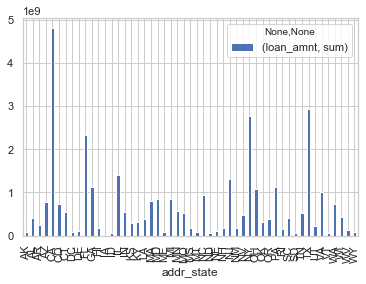

In [37]:
# plt.figure(figsize=(50,30))

acceptedloans.groupby('addr_state').agg({'loan_amnt':['sum']}).plot.bar()

Grade-wise Summary of Loans

In [7]:
acceptedloans['grade'].value_counts()

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

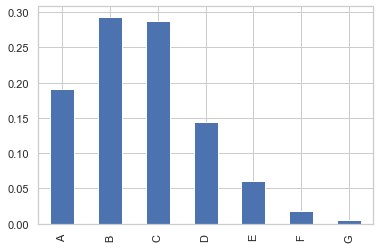

In [8]:
(acceptedloans['grade'].value_counts().sort_index()/len(acceptedloans)).plot.bar()

Grade-wise Summary of Loan Amount

In [27]:
# sum of loan amount by grade
acceptedloans.groupby('grade').agg({'loan_amnt':['sum']})

,loan_amnt
,sum
grade,
A,6.323642e+09
B,9.404818e+09
C,9.775551e+09
D,5.097344e+09
E,2.367318e+09
F,7.994102e+08
G,2.480324e+08


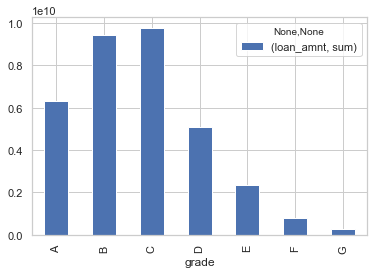

In [39]:
acceptedloans.groupby('grade').agg({'loan_amnt':['sum']}).plot.bar()

Purpose of Loans

In [10]:
acceptedloans['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

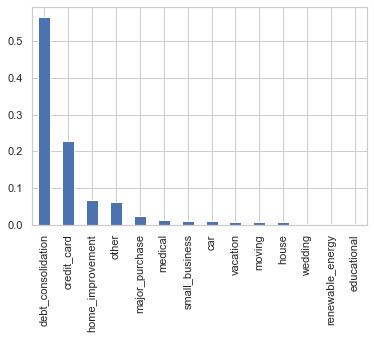

In [38]:
(acceptedloans['purpose'].value_counts()/len(acceptedloans)).plot.bar()

# Debt consolidation is the highest mentioned purpose followed by credit cards 

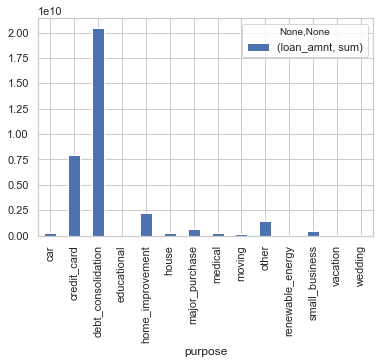

In [40]:
acceptedloans.groupby('purpose').agg({'loan_amnt':['sum']}).plot.bar()

In [16]:
acceptedloans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending=False)

purpose
small_business        0.185508
renewable_energy      0.152941
moving                0.143738
educational           0.132075
debt_consolidation    0.129131
medical               0.123217
wedding               0.118471
other                 0.117506
house                 0.112267
vacation              0.111948
major_purchase        0.108494
home_improvement      0.103033
credit_card           0.096682
car                   0.089160
Name: loan_status, dtype: float64

Notice that only 11% of completed loans for house have charged-off, but 19% of completed small business loans have charged-off.

In [17]:
acceptedloans.groupby('loan_status')['purpose'].value_counts(normalize=True).loc['Charged Off'].sort_values(ascending=False)

purpose
debt_consolidation    0.614442
credit_card           0.186112
other                 0.061011
home_improvement      0.057723
major_purchase        0.020379
small_business        0.017054
medical               0.012612
moving                0.008244
car                   0.007972
vacation              0.006472
house                 0.005909
wedding               0.001039
renewable_energy      0.000823
educational           0.000209
Name: purpose, dtype: float64

In the total Charge-off, most of them(62%) have the purpose of Debt_Consolidation

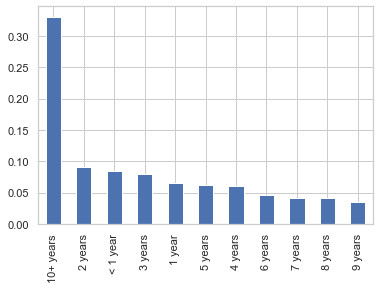

In [52]:
(acceptedloans['emp_length'].value_counts()/len(acceptedloans)).plot.bar()

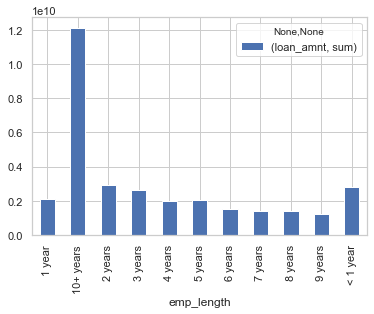

In [51]:
acceptedloans.groupby('emp_length').agg({'loan_amnt':['sum']}).plot.bar()

Installment Terms Provided

In [12]:
acceptedloans['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

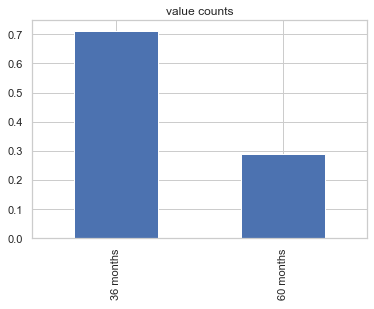

In [19]:
(acceptedloans['term'].value_counts()/len(acceptedloans)).plot.bar(title='value counts')

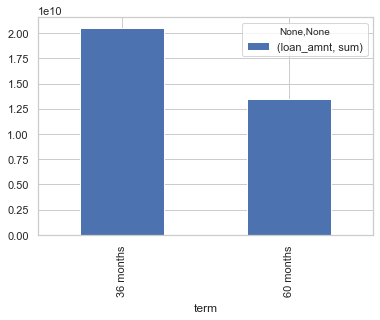

In [7]:
acceptedloans.groupby('term').agg({'loan_amnt':['sum']}).plot.bar()

In [5]:
acceptedloans.groupby('term')['loan_status'].value_counts()

term        loan_status                                        
 36 months  Fully Paid                                             857491
            Current                                                566695
            Charged Off                                            163252
            Late (31-120 days)                                      12474
            In Grace Period                                          4834
            Late (16-30 days)                                        2545
            Does not meet the credit policy. Status:Fully Paid       1789
            Does not meet the credit policy. Status:Charged Off       649
            Default                                                    25
 60 months  Current                                                311622
            Fully Paid                                             219260
            Charged Off                                            105307
            Late (31-120 days)                  

In [6]:
acceptedloans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
 36 months    0.101414
 60 months    0.161783
Name: loan_status, dtype: float64

Loans with five-year periods are 60% more likely to charge-off than loans with three-year periods.

In [8]:
acceptedloans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']

term
 36 months    0.532684
 60 months    0.336849
Name: loan_status, dtype: float64

About 73% of the completed loans have three-year periods, and the rest have five-year periods.

In [9]:
acceptedloans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Current']

term
 36 months    0.352038
 60 months    0.478745
Name: loan_status, dtype: float64

But nearly 35% of the Current loans have a term of 60 months. This is a high risk venture to be managed carefully.

In [10]:
a=acceptedloans.groupby('loan_status')['int_rate'].describe().sort_values(by='count',ascending=False).reset_index()
a

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Fully Paid,1076751.0,12.623288,4.527227,5.31,9.1700,12.23,15.3100,30.99
1,Current,878317.0,12.768128,4.874868,5.31,9.4300,11.99,15.3100,30.99
2,Charged Off,268559.0,15.710714,4.910387,5.31,12.2900,15.05,18.5500,30.99
3,Late (31-120 days),21467.0,15.637190,5.317858,5.31,11.9800,14.99,18.9400,30.99
4,In Grace Period,8436.0,15.461246,5.248388,5.31,11.5500,14.99,18.4500,30.99
5,Late (16-30 days),4349.0,15.411380,5.336441,5.31,11.4900,14.52,18.4500,30.99
6,Does not meet the credit policy. Status:Fully Paid,1988.0,13.978642,2.732150,6.00,12.3975,13.98,15.6800,21.64
7,Does not meet the credit policy. Status:Charged Off,761.0,14.597148,2.664766,7.43,12.8700,14.50,16.3200,21.64
8,Default,40.0,16.181750,6.009668,5.32,11.8600,16.73,19.2725,30.74


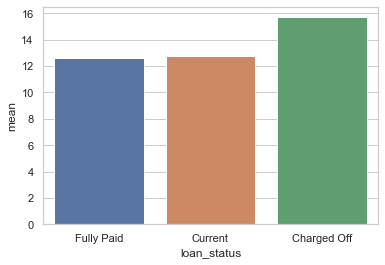

In [11]:
sns.barplot(x='loan_status',y='mean',data=a.loc[0:2,])

Higher Interest rate is a factor for Charge-off.
As you can clearly see, Charge-off has avg interest rate of 15.71% compared to the fully paid,12.62%

Loan Status vs Home Ownership

In [13]:
acceptedloans['home_ownership'].value_counts()
# Home ownership : Highest is Mortgage followed by rent 

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

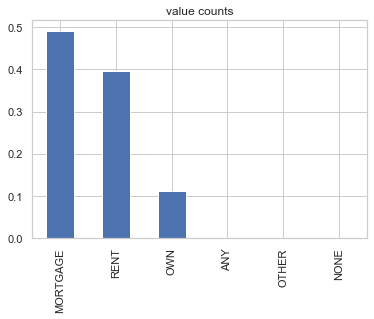

In [28]:
(acceptedloans['home_ownership'].value_counts()/len(acceptedloans)).plot.bar(title='value counts')

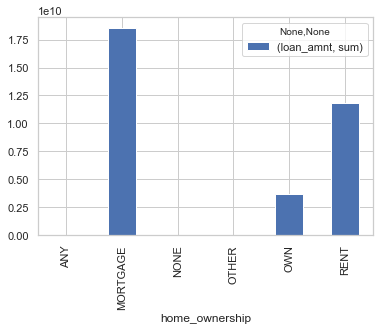

In [54]:
# Highest sum of loans is for Mortgage followed by rent
acceptedloans.groupby('home_ownership').agg({'loan_amnt':['sum']}).plot.bar()

In [12]:
acceptedloans.groupby('loan_status')['home_ownership'].value_counts(normalize=True).loc['Charged Off']

home_ownership
RENT        0.461999
MORTGAGE    0.426465
OWN         0.111201
ANY         0.000209
OTHER       0.000101
NONE        0.000026
Name: home_ownership, dtype: float64

In [13]:
acceptedloans.groupby('loan_status')['home_ownership'].value_counts(normalize=True).loc['Fully Paid']

home_ownership
MORTGAGE    0.511769
RENT        0.381097
OWN         0.106773
ANY         0.000214
OTHER       0.000109
NONE        0.000038
Name: home_ownership, dtype: float64

In [14]:
acceptedloans.groupby('home_ownership')['loan_status'].value_counts(normalize=True)

home_ownership  loan_status                                        
ANY             Current                                                0.687751
                Fully Paid                                             0.230924
                Charged Off                                            0.056225
                Late (31-120 days)                                     0.018072
                In Grace Period                                        0.006024
                Late (16-30 days)                                      0.001004
MORTGAGE        Fully Paid                                             0.495792
                Current                                                0.386259
                Charged Off                                            0.103046
                Late (31-120 days)                                     0.008375
                In Grace Period                                        0.003645
                Late (16-30 days)                   

In [15]:
acceptedloans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
ANY         0.056225
MORTGAGE    0.103046
NONE        0.129630
OTHER       0.148352
OWN         0.118013
RENT        0.138641
Name: loan_status, dtype: float64

Interestingly, people who own house have higher charge-off percentage than people whose homes are already mortgaged

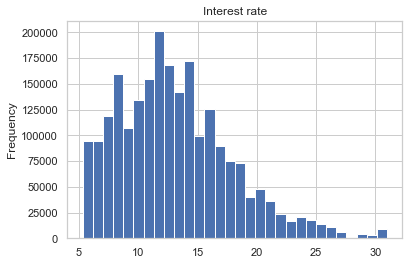

In [8]:
acceptedloans['int_rate'].plot.hist(bins=30, title='Interest rate')


FICO Ranges

In [14]:
acceptedloans['fico_range_high'].describe()

count    2.260668e+06
mean     7.025884e+02
std      3.301124e+01
min      6.140000e+02
25%      6.790000e+02
50%      6.940000e+02
75%      7.190000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

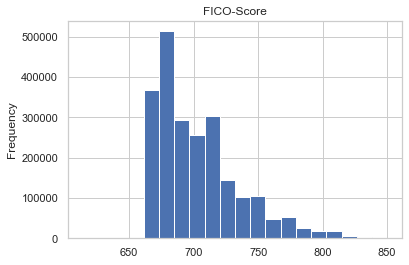

In [24]:
acceptedloans['fico_range_high'].plot.hist(bins=20, title='FICO-Score')


In [15]:
acceptedloans['fico_range_low'].describe()

count    2.260668e+06
mean     6.985882e+02
std      3.301038e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

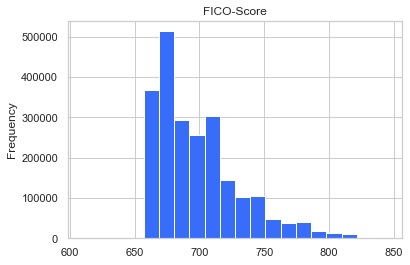

In [45]:
acceptedloans['fico_range_low'].plot.hist(bins=20, title='FICO-Score')

In [24]:
acceptedloans['fico_score'] =(acceptedloans['fico_range_low'] +acceptedloans['fico_range_high'])/2
acceptedloans.groupby('loan_status')['fico_score'].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,1076751.0,700.263982,32.834008,627.0,677.0,692.0,717.0,847.5
Current,878317.0,704.561296,34.470359,662.0,677.0,697.0,722.0,847.5
Charged Off,268559.0,689.850145,25.948737,662.0,672.0,682.0,702.0,847.5
Late (31-120 days),21467.0,694.318768,29.179855,662.0,672.0,687.0,707.0,847.5
In Grace Period,8436.0,693.344832,28.406019,662.0,672.0,687.0,707.0,842.0
Late (16-30 days),4349.0,695.215797,30.061864,662.0,672.0,687.0,712.0,847.5
Does not meet the credit policy. Status:Fully Paid,1988.0,688.619718,29.415840,612.0,667.0,687.0,707.0,807.0
Does not meet the credit policy. Status:Charged Off,761.0,682.394218,26.309937,617.0,662.0,677.0,702.0,802.0
Default,40.0,705.375000,40.213971,662.0,677.0,694.5,727.0,817.0


As expected, FICO score of Charge-off is less than Fully Paid by 11 points, which reinforces that FICO score is a good indicator of paying their debts back.

Summary of Installments

In [6]:
acceptedloans['installment'].describe()

count    2.260668e+06
mean     4.458068e+02
std      2.671735e+02
min      4.930000e+00
25%      2.516500e+02
50%      3.779900e+02
75%      5.933200e+02
max      1.719830e+03
Name: installment, dtype: float64

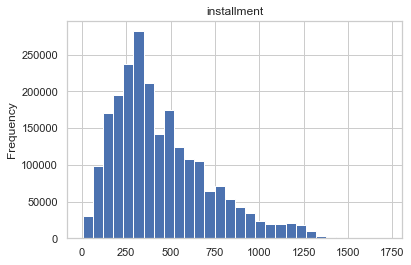

In [7]:
acceptedloans['installment'].plot.hist(bins=30, title='installment')

Summary of Interest Rates

In [ ]:
Loading a new Dataset "Quarter". It has year to quarter mapping from 2007 to 2018

In [31]:
Quarter=pd.read_csv('Year_Quarter Mapping.csv')
Quarter

,issue_d,issue_Quarter,issue_year,year
0,Jan-2007,Q1,2007,2007-1
1,Feb-2007,Q1,2007,2007-1
2,Mar-2007,Q1,2007,2007-1
3,Apr-2007,Q2,2007,2007-2
4,May-2007,Q2,2007,2007-2
5,Jun-2007,Q2,2007,2007-2
6,Jul-2007,Q3,2007,2007-3
7,Aug-2007,Q3,2007,2007-3
8,Sep-2007,Q3,2007,2007-3
9,Oct-2007,Q4,2007,2007-4


In [33]:
acceptedloans=pd.merge(acceptedloans,Quarter)

In [17]:
acceptedloans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_Quarter,issue_year,year
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Q4,2015,2015-4
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.

In [19]:
B=acceptedloans.pivot_table(index='year',values='id',aggfunc='count').reset_index()

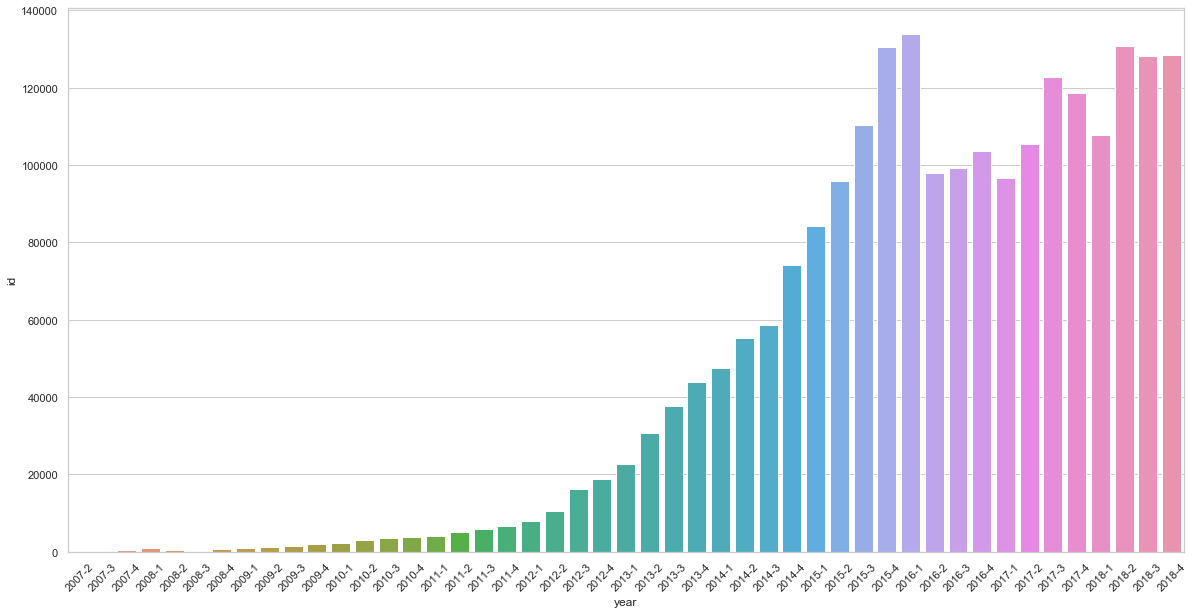

In [20]:
plt.rcParams["figure.figsize"] = [20,10]
A=sns.barplot(data=B,x='year',y='id')
A.set_xticklabels(A.get_xticklabels(),rotation=45);

In [21]:
C=acceptedloans.pivot_table(index='year',values='loan_amnt',aggfunc='sum').reset_index()

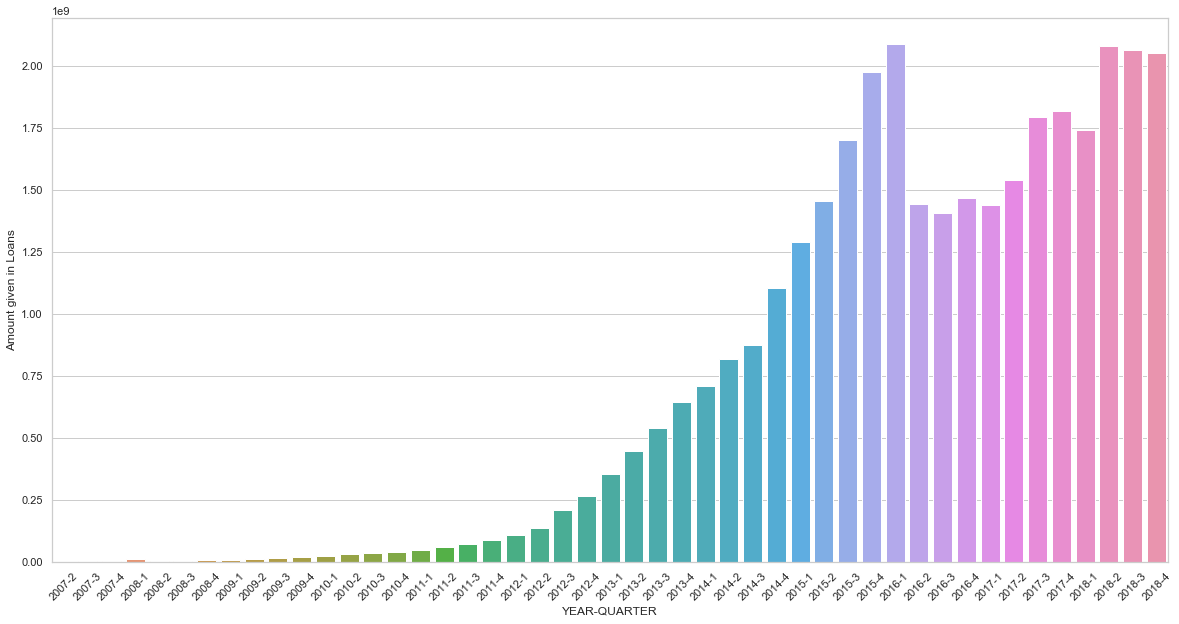

In [22]:
plt.rcParams["figure.figsize"] = [20,10]
A=sns.barplot(data=C,x='year',y='loan_amnt')
A.set_xlabel('YEAR-QUARTER')
A.set_ylabel('Amount given in Loans')
A.set_xticklabels(A.get_xticklabels(),rotation=45);

In [4]:
rejectedloans=pd.read_csv('rejected_2007_to_2018Q4.csv')

In [18]:
rejectedloans.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [35]:
rejectedloans.describe(include=object)

,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length
count,27648741,27647438,27648741,27648448,27648719,26697386
unique,4238,73928,126145,1001,51,11
top,2018-12-04,Debt consolidation,100%,112xx,CA,< 1 year
freq,42112,6418016,1362556,267102,3242169,22994315


In [36]:
acceptedloans['zip_code'].describe(include=object)
# Top applications are from  Brooklyn

count     2260667
unique        956
top         112xx
freq        23908
Name: zip_code, dtype: object

In [37]:
acceptedloans['addr_state'].describe(include=object)
# Top applications are from  California

count     2260668
unique         51
top            CA
freq       314533
Name: addr_state, dtype: object

Charge-off by States(Top 5)

In [ ]:
acceptedloans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending=False).head()

Charge-off by States(bottom 5)

In [20]:
acceptedloans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending=False).tail()

addr_state
NH    0.084365
VT    0.074944
ID    0.073816
IA    0.071429
ME    0.056494
Name: loan_status, dtype: float64

In [38]:
acceptedloans['emp_length'].describe(include=object)
# Top applications are with an employment length of more than 10 years

count       2113761
unique           11
top       10+ years
freq         748005
Name: emp_length, dtype: object

(array([2.260662e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.0e+00, 1.1e+07, 2.2e+07, 3.3e+07, 4.4e+07, 5.5e+07, 6.6e+07,
        7.7e+07, 8.8e+07, 9.9e+07, 1.1e+08]),
 <a list of 10 Patch objects>)

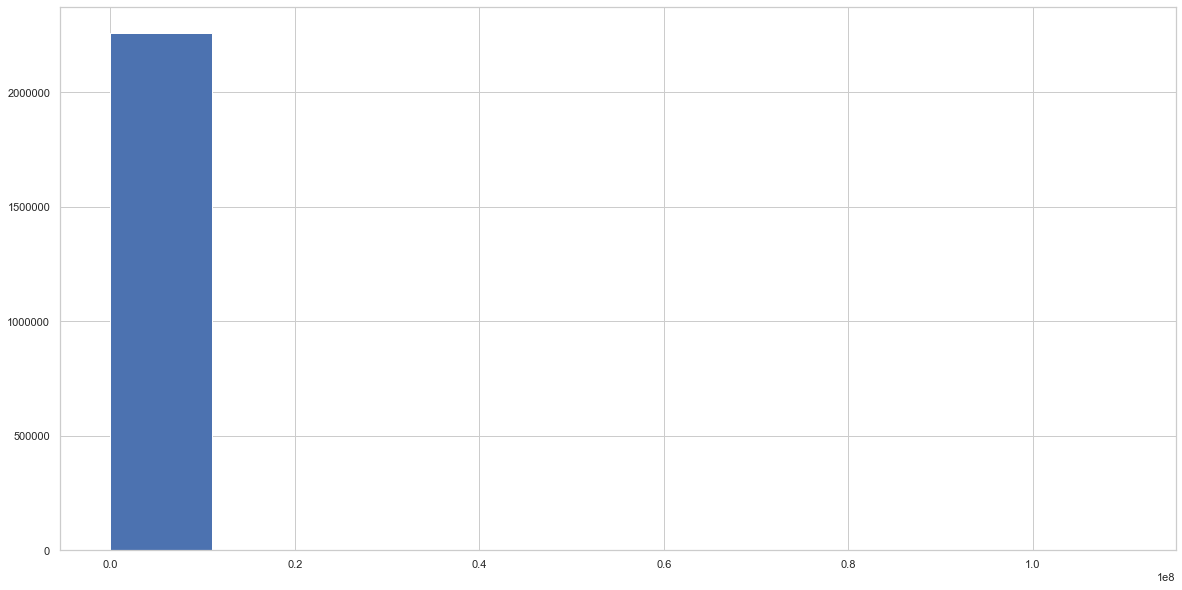

In [64]:
# Analysis on annual income of accepted loan applicants
plt.hist(acceptedloans['annual_inc'])
# Below histogram doesn't plot all the available values. 
# We try to remove the outliers and plot the maximum possible range of income

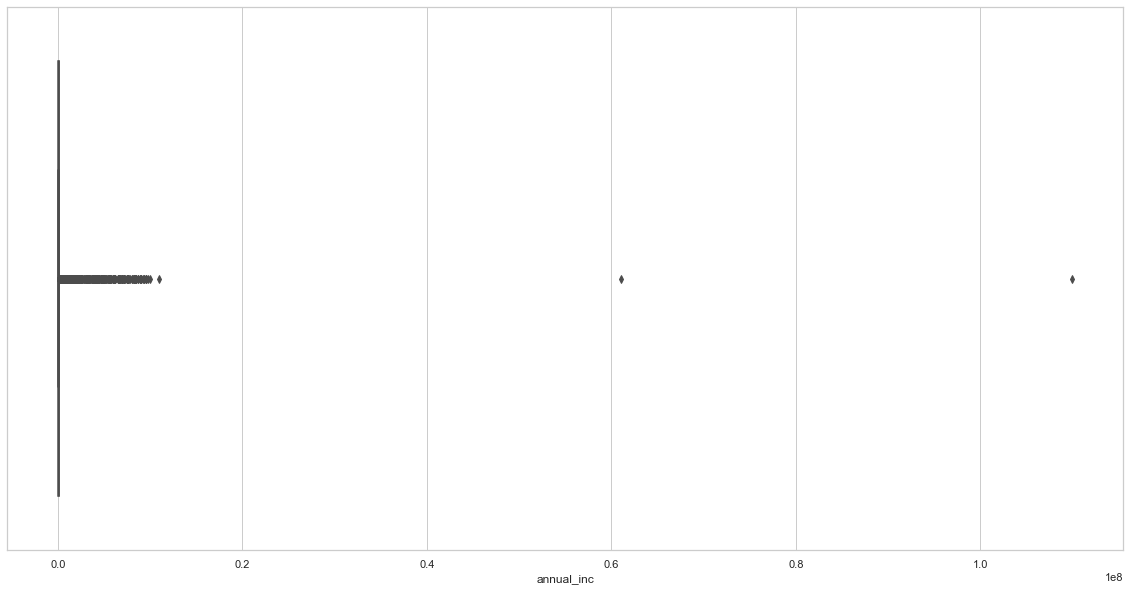

In [65]:
sns.boxplot(x=acceptedloans['annual_inc'])

In [3]:
# Calculating inter quartile range

Q1 = acceptedloans['annual_inc'].quantile(0.25)
Q3 = acceptedloans['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

47000.0


In [4]:
# Removing outliers and increasing the acceptance range to 2.5*IQR

acc_out = acceptedloans[~((acceptedloans['annual_inc'] < (Q1 - 2.5 * IQR)) |(acceptedloans['annual_inc'] > (Q3 + 2.5 * IQR)))]

In [50]:
acc_out.shape

(2212913, 154)

In [67]:
acceptedloans.shape

(2260668, 154)

In [68]:
2260668-2212913

# 47755 values are removed as outliers

47755

In [ ]:
# Histogram after removing the outliers
plt.hist(acc_out['annual_inc'])
np.warnings.filterwarnings('ignore')

In [69]:
acceptedloans['annual_inc'].describe(include=object)


count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

(array([2.256342e+06, 1.774000e+03, 3.510000e+02, 1.410000e+02,
        8.500000e+01, 5.000000e+01, 3.300000e+01, 2.300000e+01,
        1.400000e+01, 1.440000e+02]),
 array([ -1.,  99., 199., 299., 399., 499., 599., 699., 799., 899., 999.]),
 <a list of 10 Patch objects>)

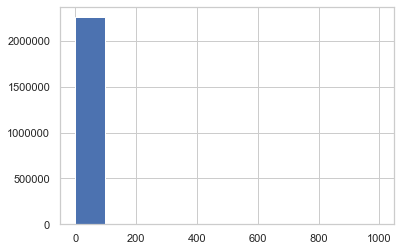

In [15]:
# Analysis on debt to income ratio

plt.hist(acceptedloans['dti'])
# Below histogram doesn't plot all the available values. 
# We try to remove the outliers and plot the maximum possible range of income

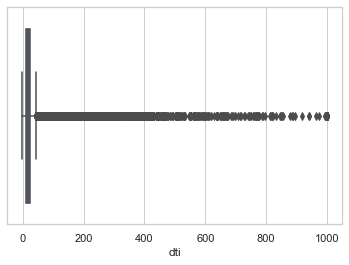

In [5]:
sns.boxplot(x=acceptedloans['dti'])

In [7]:
Q1 = acceptedloans['dti'].quantile(0.25)
Q3 = acceptedloans['dti'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12.599999999999998


In [9]:
acc_out1 = acceptedloans[~((acceptedloans['dti'] < (Q1 - 1.5 * IQR)) |(acceptedloans['dti'] > (Q3 + 1.5 * IQR)))]

In [10]:
acc_out1.shape

(2239121, 151)

In [12]:
2260668-2239121

21547

C:\Users\Srujana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Srujana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


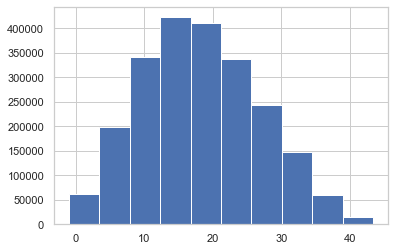

In [13]:
plt.hist(acc_out1['dti'])
np.warnings.filterwarnings('ignore')

Comparision of employee length in Accepted and rejected data
Maximum of accepted loan applicants are above 10 years
Maximum of rejected loan applicants are less than 1 year

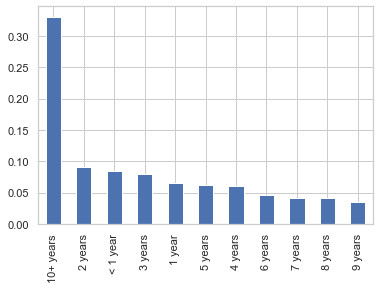

In [5]:
(acceptedloans['emp_length'].value_counts()/len(acceptedloans)).plot.bar()

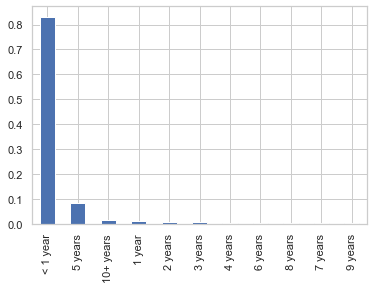

In [22]:
(rejectedloans['Employment Length'].value_counts()/len(rejectedloans)).plot.bar()

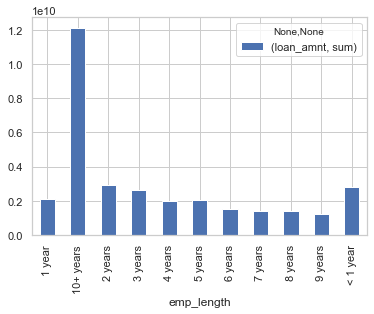

In [23]:
acceptedloans.groupby('emp_length')).agg({'loan_amnt':['sum']}).plot.bar()

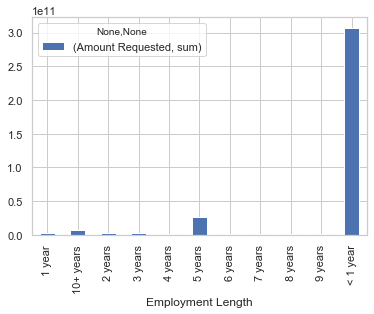

In [23]:
rejectedloans.groupby('Employment Length').agg({'Amount Requested':['sum']}).plot.bar()

In [7]:
# Loan status of all the accepted applications

acceptedloans.groupby('loan_status')['loan_amnt'].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0
Current,878317.0,15942.815920,9771.679047,1000.0,8400.0,14000.0,21500.0,40000.0
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Late (31-120 days),21467.0,16946.614571,9665.983393,1000.0,10000.0,15000.0,24000.0,40000.0
In Grace Period,8436.0,17672.558084,9750.247681,1000.0,10000.0,16000.0,24600.0,40000.0
Late (16-30 days),4349.0,17391.118648,9987.086894,1000.0,10000.0,15000.0,24800.0,40000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.0,7200.0,12000.0,25000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.0,7750.0,12000.0,25000.0
Default,40.0,14350.625000,10323.789256,1675.0,5875.0,10475.0,20000.0,40000.0


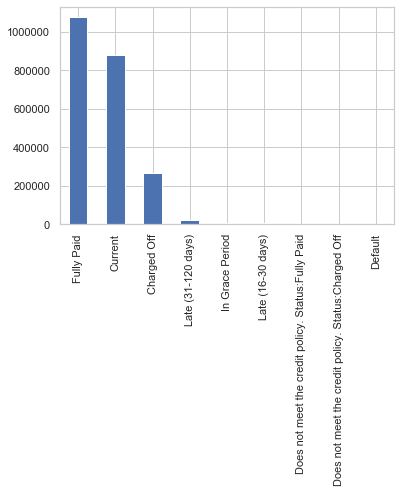

In [4]:
(acceptedloans['loan_status'].value_counts()).plot.bar()

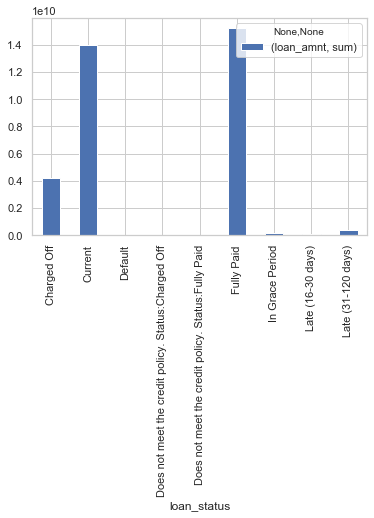

In [5]:
acceptedloans.groupby('loan_status').agg({'loan_amnt':['sum']}).plot.bar()

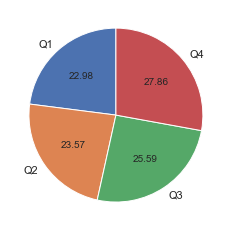

In [29]:
# Maximum loans are requested in the 4th quarter of the year

pieLabels= 'Q1', 'Q2', 'Q3', 'Q4'
populationShare= [7.816068e+09,8.019030e+09,8.703804e+09,9.477214e+09]
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, 
        labels=pieLabels, 
        autopct='%1.2f',
        startangle=90);

In [ ]:
Open Lines

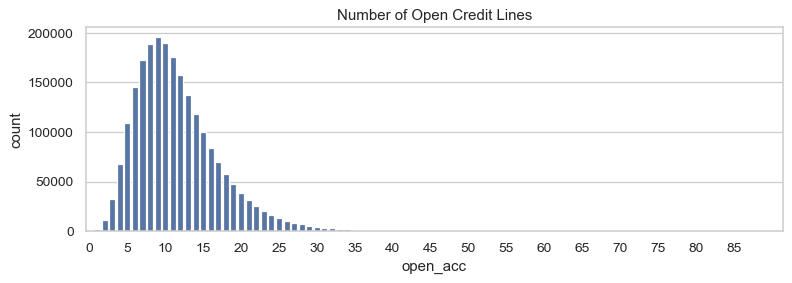

In [25]:
plt.figure(figsize=(10,3), dpi=90);
sns.countplot(acceptedloans['open_acc'], order=sorted(acceptedloans['open_acc'].unique()), color='#5975A4', saturation=1);
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5));
plt.title('Number of Open Credit Lines');

Is there a difference in number of credit lines between fully paid loans and charged-off loans?

There is no big difference in the average value of open accounts across different loan statuses.

In [26]:
acceptedloans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,11.901269,5.637964,0.0,8.0,11.0,15.0,76.0
Current,878317.0,11.644579,5.876511,0.0,7.0,11.0,15.0,101.0
Default,40.0,11.325000,7.269139,2.0,7.0,9.5,13.0,43.0
Does not meet the credit policy. Status:Charged Off,758.0,10.001319,5.775752,1.0,6.0,9.0,13.0,47.0
Does not meet the credit policy. Status:Fully Paid,1962.0,10.102446,5.634472,1.0,6.0,9.0,13.0,46.0
Fully Paid,1076751.0,11.516763,5.429354,0.0,8.0,11.0,14.0,90.0
In Grace Period,8436.0,11.749526,5.880571,1.0,8.0,11.0,15.0,57.0
Late (16-30 days),4349.0,11.479650,5.772509,1.0,7.0,10.0,14.0,45.0
Late (31-120 days),21467.0,11.647599,5.941777,0.0,7.0,11.0,15.0,57.0


Apparently, Individuals who pay off their loans are more likely to have several mortgage accounts.

In [35]:
acceptedloans['application_type'].value_counts()

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64

In [36]:
acceptedloans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.122533
Joint App     0.052556
Name: loan_status, dtype: float64

Clearly, Joint loans are slightly less likely to be charged-off.

Loans by Year

Text(0.5, 1.0, 'Loans Funded per Year')

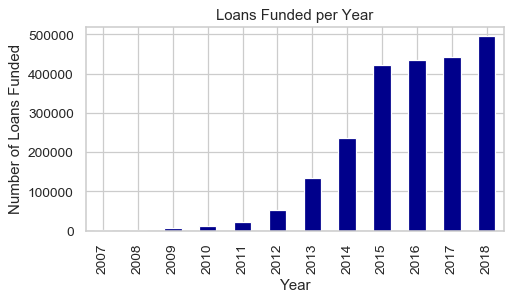

In [34]:
plt.figure(figsize=(6,3), dpi=90)
acceptedloans['issue_year'].value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [38]:
acceptedloans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score,issue_Quarter,issue_year,year
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,677.0,Q4,2015,2015-4
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.

# MODELLING

In [106]:
df=pd.read_csv('acceptedloans.csv')
np.warnings.filterwarnings('ignore')

The reason to build a machine learning model on this data is, Lending Club has lost 2 billion dollars over the last decade because of  Charg-Off. So, we can build an ML algorithm to predict Charge-off & save huge money.

In [89]:
df['loan_status'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [90]:
# Loan Amount-Total Amount Paid Back
df[df['loan_status']==1]['loan_amnt'].sum()-df[df['loan_status']==1]['total_pymnt'].sum()

1953490612.2249308

Before doing that, we have to pre-process data

For a new customer, we would like to classify whether he will Fully pay back the loan or he will Charge off? To build a model for this, we are using only loan_status = 'Fully Paid' & 'Charged Off'. So filtering the data set on these 2 values for loan_status column

In [107]:
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]
np.warnings.filterwarnings('ignore')

Changing categorical variable 'loan_status' to numerical. 0 for Fully Paid & 1 for Charged Off

In [93]:
df['loan_status'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

Taking average of FICO_low & FICO_high as a new variable "FICO_score"

In [94]:
df["fico_score"]=(df["fico_range_low"]+df["fico_range_high"])/2

Changing the categorical attribute "emp_length" to numerical attribute.

In [103]:
def emp_covert_to_num(a):
    if pd.isna(a):
        return None
    elif a[2]=='+':
        return 10
    elif a[0]=='<':
        return 0
    else:
        return int(a[0])
df['emp_length'] = df['emp_length'].apply(emp_covert_to_num);

Summary of Employment Length

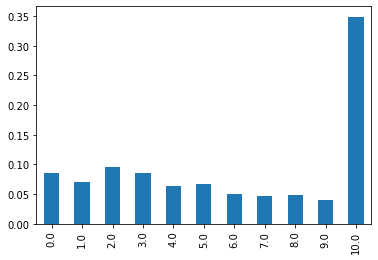

In [40]:
(df['emp_length'].value_counts(normalize=True).sort_index()).plot.bar();

Default Rates across grades

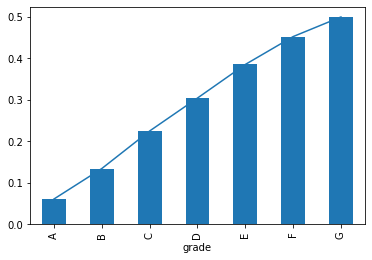

In [45]:
df.groupby('grade')['loan_status'].mean().plot.line()
df.groupby('grade')['loan_status'].mean().plot.bar();

Clearly, There is a linear connection between the grade and the default rates across grades.

Interest Rates across Grades

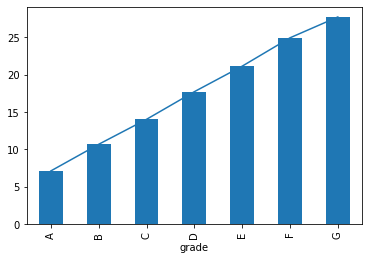

In [48]:
df.groupby('grade')['int_rate'].mean().plot.line()
df.groupby('grade')['int_rate'].mean().plot.bar();

The relation between interest rates across grades is linear too

We now are interested to see if there's a linear relationship between Interest rate & Default rate across grades. As there are only 7 grades, we will better fit the linear model over sub_grades as there are a total of 35 sub_grades(5 in each grade)

In [61]:
df['grade'].unique().shape

(7,)

In [60]:
df['sub_grade'].unique().shape

(35,)

Training a Linear Regression model on the data

In [103]:
x=df.groupby('sub_grade')['loan_status'].mean()
x1=x.values.reshape(-1,1)

In [104]:
y=df.groupby('sub_grade')['int_rate'].mean()

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1,y);

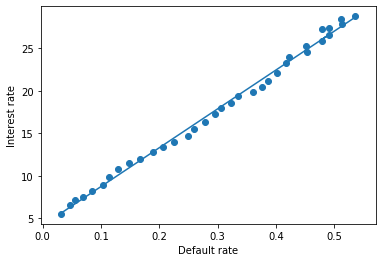

In [84]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,lr.predict(df.groupby('sub_grade')['loan_status'].mean().values.reshape(-1,1)));
plt.xlabel('Default rate');
plt.ylabel('Interest rate');

Interest Rate - Default Rate Linear Equation

In [89]:
print('I =', lr.intercept_, '+', lr.coef_[0], '* D');

I = 4.168366169072902 + 45.68477614996915 * D


We have now established a linear relationship between Interest Rate & Default rate

We now want to build a logistic regression model which classifies customers on whether they will repay the loan or not by using their demographics before giving them loans. This could help us in saving money

# Training the Logistic Regression

Reducing the dataset to the major columns that are known to investors before the loan is funded.

In [105]:
columns = ['loan_amnt','grade', 'emp_length',
       'home_ownership','annual_inc','verification_status',
       'loan_status','purpose',
       'addr_state','dti','delinq_2yrs',
       'fico_range','inq_last_6mths','open_acc',
       'pub_rec','revol_bal','revol_util','total_acc']
df = df[columns]
df.shape

(1345310, 18)

In [106]:
df.head()

,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,3600.0,C,10.0,MORTGAGE,55000.0,Not Verified,0,debt_consolidation,PA,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0
1,24700.0,C,10.0,MORTGAGE,65000.0,Not Verified,0,small_business,SD,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0
2,20000.0,B,10.0,MORTGAGE,63000.0,Not Verified,0,home_improvement,IL,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0
4,10400.0,F,3.0,MORTGAGE,104433.0,Source Verified,0,major_purchase,PA,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0
5,11950.0,C,4.0,RENT,34000.0,Source Verified,0,debt_consolidation,GA,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,68.4,6.0


In [107]:
df.dropna(inplace=True)

C:\Users\personal\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
df.shape

(1265975, 18)

Changing Grades into Numerical Values

In [109]:
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

C:\Users\personal\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Encoding all the categorical variables by creating new columns for all columns by using Dummies Function.

In [111]:
df_dummies = pd.get_dummies(df)

Dropping all dummy-variables which has their respective shares lesser than 1% of their representative columns.
In this case we can simply look at the mean of the features because all non-dummy variables have means greater than 0.01

In [112]:
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)]
df_dummies.drop(drop_columns, axis=1, inplace=True)

Merging 2 verification status variables to one variable.

In [117]:
df_dummies['verification_status_Verified_sum'] =df_dummies['verification_status_Source Verified']
+df_dummies['verification_status_Verified']
df_dummies.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)

In [118]:
df_dummies.head()

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI,verification_status_Verified_sum
0,3600.0,3,10.0,55000.0,0,5.91,0.0,675.0,1.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,24700.0,3,10.0,65000.0,0,16.06,1.0,715.0,4.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,2,10.0,63000.0,0,10.78,0.0,695.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,6,3.0,104433.0,0,25.37,1.0,695.0,3.0,12.0,...,0,0,1,0,0,0,0,0,0,1
5,11950.0,3,4.0,34000.0,0,10.20,0.0,690.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1


Now, we have changed all categorical variables to Numerical variables for building a model.

In [119]:
X = df_dummies.drop('loan_status', axis=1)
y = df_dummies['loan_status']

Splitting the data into test & train data

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l1', C=0.01)

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [124]:
pipe_lr.fit(X_train, y_train);

C:\Users\personal\Anaconda3_NEW\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC-AUC-score:  0.7018895025208165


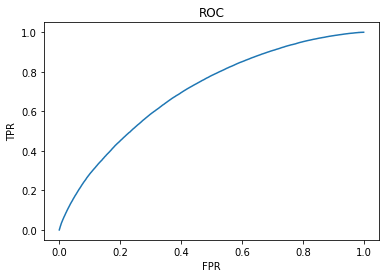

In [125]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

Now, we have acheived an ROC-AUC-score of 0.70,  it means there is 70% chance that model will be able to distinguish between statuses.

The model can further be improved by including more variables into the mix.